### Modelo_tres. ( Mejorando modelo 0.2 )   OneHotEncoder & Normalizado & Desbalanceado

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import numpy as np

import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier 
from pylab import rcParams 

from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier 
from collections import Counter

In [6]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/cleanned_data/df.tfm')

In [7]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


In [8]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [10]:
lbl.fit_transform(df['tipo_gestor'])
lbl.fit_transform(df['esta_carterizado'])
lbl.fit_transform(df['cliente_bbp'])
lbl.fit_transform(df['cartera_patron'])
lbl.fit_transform(df['digital_3_meses'])
lbl.fit_transform(df['camino_digital'])
lbl.fit_transform(df['marca_bp'])
lbl.fit_transform(df['marca_ccte'])
lbl.fit_transform(df['seg_valor'])
lbl.fit_transform(df['seg_recorrido'])


array([1, 0, 1, ..., 3, 3, 0])

In [11]:
df['tipo_gestor_etiqueta']=lbl.fit_transform(df['tipo_gestor'])
df['esta_carterizado_etiqueta']=lbl.fit_transform(df['esta_carterizado'])
df['cliente_bbp_etiqueta']=lbl.fit_transform(df['cliente_bbp'])
df['cartera_patron_etiqueta']=lbl.fit_transform(df['cartera_patron'])
df['digital_3_meses_etiqueta']=lbl.fit_transform(df['digital_3_meses'])
df['camino_digital_etiqueta']=lbl.fit_transform(df['camino_digital'])
df['marca_bp_etiqueta']=lbl.fit_transform(df['marca_bp'])
df['marca_ccte_etiqueta']=lbl.fit_transform(df['marca_ccte'])
df['seg_valor_etiqueta']=lbl.fit_transform(df['seg_valor'])
df['seg_recorrido_etiqueta']=lbl.fit_transform(df['seg_recorrido'])

In [12]:
df['tipo_gestor_etiqueta'].value_counts()

0    403840
1     43144
2      4390
Name: tipo_gestor_etiqueta, dtype: int64

In [13]:
df['tipo_gestor'].value_counts()

ASESOR FINANCIERO          403840
SIN GESTOR                  43144
SUBDIRECCIÓN DE OFICINA      4390
Name: tipo_gestor, dtype: int64

In [14]:
df.drop(['tipo_gestor','esta_carterizado','cliente_bbp',
         'cartera_patron','digital_3_meses','camino_digital',
         'marca_bp','marca_ccte','seg_valor','seg_recorrido'],axis = 1,inplace = True)

In [15]:
# Convierto variables a object
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);

## Normalizamos

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
#con todos los datos numericos
df_datos_numericos =  df.select_dtypes('number')
#df_datos_numericos =  df[['saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp']]

In [19]:
df_normalizado = scaler.fit_transform(df_datos_numericos)

In [20]:
columnas_datos_numericos = df_datos_numericos.columns

In [21]:
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas_datos_numericos)

In [22]:
df_normalizado.head(2)

,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,edad,...,tipo_gestor_etiqueta,esta_carterizado_etiqueta,cliente_bbp_etiqueta,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
0,0.258207,0.001689,0.415566,0.031101,1.0,1.0,1.0,1.0,1.0,0.584746,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333
1,0.223408,0.001689,0.355362,0.000000,0.0,0.0,0.0,1.0,1.0,0.686441,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000


## Modelo KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

In [27]:
# X = df[['saldo_captacion,'saldo_financiacion')
X = df_normalizado
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 11284350 (451374, 25)
Datos y = 451374 (451374,)


In [28]:
clf = KNeighborsClassifier(n_neighbors=5)

In [29]:
clf.fit(X,y)

KNeighborsClassifier()

In [30]:
clf.predict(X)

array([1, 0, 0, ..., 0, 0, 0])

In [31]:
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [32]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
clf.predict(X_test)

array([0, 1, 0, ..., 0, 1, 0])

In [34]:
clf.predict_proba(X_test)[:, 1]

array([0., 1., 0., ..., 0., 1., 0.])

[[78490     0]
 [   24 11761]]


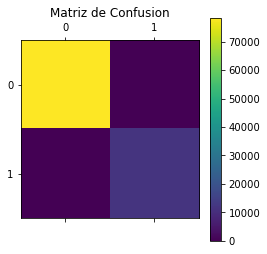

In [35]:
matriz_confusion_clf = confusion_matrix(y_test,clf.predict(X_test))
print(matriz_confusion_clf)
pl.matshow(confusion_matrix(y_test,clf.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [ ]:
print('====================================')
print ('accuracy_score = ', accuracy_score(y_test,clf.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clf.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clf.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clf.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clf.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, clf.predict(X_test)))

accuracy_score =  0.9997341456660205
precision = 1.0
recall = 0.9979635129401782


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,cv = 5,scoring="accuracy").mean()

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,scoring="recall").mean()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(KNeighborsClassifier(),
param_grid={"n_neighbors":np.arange(3,10)})

In [ ]:
clf.fit(X,y)

In [ ]:
clf.best_params_